In [1]:
import json
import numpy as np
from IPython.display import display, Image
from matplotlib import pyplot as plt

In [2]:
with open("places_trained_data_result3.json") as f:
  result_data = json.load(f)

In [3]:
sample_data = result_data[0]
print(sample_data.keys())

dict_keys(['index', 'label', 'label_int', 'file_names', 'file_path', 'assign', 'vgg_clusters', 'resnet_clusters', 'inception_clusters', 'densenet_clusters', 'vgg_predicted_score', 'vgg_predicted_label', 'resnet_predicted_score', 'resnet_predicted_label', 'inception_predicted_score', 'inception_predicted_label', 'densenet_predicted_score', 'densenet_predicted_label'])


In [4]:
sum = 0
misclassified = dict()
correct_classified = dict()
high_conf_inc_dict = dict()
low_conf_cor_dict = dict()
high_conf_inc_list = []
low_conf_cor_list = []
for i in range(len(result_data)):
  cur = result_data[i]
  if cur['label_int'] != cur['densenet_predicted_label']:
    sum += 1
    if cur['label'] in misclassified.keys():
      misclassified[cur['label']].append(i)
    else:
      misclassified[cur['label']] = [i]
  else:
    if cur['label'] in correct_classified.keys():
      correct_classified[cur['label']].append(i)
    else:
      correct_classified[cur['label']] = [i]
  if cur['label_int'] != cur['densenet_predicted_label']:
    max_idx = np.argmax(cur['densenet_predicted_score'])
    if cur['densenet_predicted_score'][max_idx] > 0.7:
      high_conf_inc_list.append(i)
      if cur['label'] in high_conf_inc_dict.keys():
        high_conf_inc_dict[cur['label']].append(i)
      else:
        high_conf_inc_dict[cur['label']] = [i]
  elif cur['label_int'] == cur['densenet_predicted_label']:
    max_idx = np.argmax(cur['densenet_predicted_score'])
    if cur['densenet_predicted_score'][max_idx] < 0.6:
      low_conf_cor_list.append(i)
      if cur['label'] in low_conf_cor_dict.keys():
        low_conf_cor_dict[cur['label']].append(i)
      else:
        low_conf_cor_dict[cur['label']] = [i]

In [5]:
high_conf_inc_dict

{'airfield': [6, 69],
 'airplane_cabin': [114],
 'amusement_arcade': [218],
 'army_base': [332, 346, 371, 379, 394],
 'basketball_court_indoor': [459, 472],
 'bus_station_indoor': [573],
 'corral': [667],
 'florist_shop_indoor': [709, 716],
 'glacier': [889],
 'pagoda': [922, 953, 983],
 'swimming_pool_outdoor': [1001, 1067, 1082],
 'ticket_booth': [1229, 1245, 1250, 1268],
 'train_station_platform': [1323, 1379],
 'windmill': [1460, 1484]}

In [6]:
low_conf_cor_dict

{'amusement_arcade': [214, 298],
 'basketball_court_indoor': [445, 493],
 'bus_station_indoor': [512, 523],
 'corral': [617],
 'pagoda': [967, 971],
 'television_room': [1121, 1123],
 'ticket_booth': [1221, 1251]}

In [7]:
label_list = list(correct_classified.keys())
print(label_list)

labels_dict = dict()
for idx in range(len(label_list)):
  labels_dict[idx] = label_list[idx]

['airfield', 'airplane_cabin', 'amusement_arcade', 'army_base', 'basketball_court_indoor', 'bus_station_indoor', 'corral', 'florist_shop_indoor', 'glacier', 'pagoda', 'swimming_pool_outdoor', 'television_room', 'ticket_booth', 'train_station_platform', 'windmill']


In [8]:
misclassified

{'airfield': [6, 59, 69, 91],
 'airplane_cabin': [100, 114, 127],
 'amusement_arcade': [218, 253, 268, 273, 287, 292],
 'army_base': [305, 332, 342, 346, 352, 371, 379, 394],
 'basketball_court_indoor': [459, 472],
 'bus_station_indoor': [505, 518, 569, 573],
 'corral': [613, 614, 667],
 'florist_shop_indoor': [706, 709, 716, 720],
 'glacier': [845, 889],
 'pagoda': [922, 926, 953, 983],
 'swimming_pool_outdoor': [1001, 1067, 1082],
 'ticket_booth': [1229, 1239, 1245, 1250, 1252, 1268, 1274, 1281, 1290],
 'train_station_platform': [1323, 1333, 1341, 1379],
 'windmill': [1460, 1484]}

In [9]:
# check main cluster

In [10]:
with open("ace_json_results2/ace_DenseNet_bus-station-indoor.json") as f:
  d_bus = json.load(f)
with open("ace_json_results2/ace_DenseNet_basketball-court-indoor.json") as f:
  d_basket = json.load(f)
with open("ace_json_results2/ace_DenseNet_amusement-arcade.json") as f:
  d_arcade = json.load(f)
with open("ace_json_results2/ace_DenseNet_train-station-platform.json") as f:
  d_train = json.load(f)
with open("ace_json_results2/ace_DenseNet_ticket-booth.json") as f:
  d_ticket = json.load(f)
with open("ace_json_results2/ace_DenseNet_army-base.json") as f:
  d_army = json.load(f)
with open("ace_json_results2/ace_DenseNet_airfield.json") as f:
  d_airfield = json.load(f)
with open("ace_json_results2/ace_DenseNet_florist-shop-indoor.json") as f:
  d_florist = json.load(f)
with open("ace_json_results2/ace_DenseNet_swimming-pool-outdoor.json") as f:
  d_swimming = json.load(f)

In [11]:
def get_img_ace_id(idx, result_data, ace_data):
  file_name = result_data[idx]['file_names']
  
  file_names_val = list(ace_data['filename_match'].keys())
  #print(len(file_names_val))
  for idx in range(len(file_names_val)):
    val = str(file_names_val[idx])
    if str(file_name) in val:
      img_id = ace_data['filename_match'][val]
      return img_id
      
  return 'None'

In [12]:
d_ticket.keys()

dict_keys(['concept', 'masked', 'full_masked', 'results', 'summary', 'cam_results', 'filename_match'])

In [13]:
def get_concepts_path(img_id, ace_data):
  concepts = ace_data['concept']
  patches = dict()
  concepts_keys = concepts.keys()
  for key in concepts_keys:
    concept_num = key.split("_")[-2]
    con = concepts[key]['file']
    for c in range(len(con)):
      name = con[c]
      #name_list = str((name.split("/"))[-1])
      name_list = str((name.split("\\"))[-1])
      concept_id = name_list.split(".")[0]
      if img_id in name:
        if concept_num in patches.keys():
          patches[concept_num]['path'].append(name)
          patches[concept_num]['concept_id'].append(concept_id)
        else:
          patches[concept_num] = dict()
          patches[concept_num]['path'] = [name]
          patches[concept_num]['concept_id'] = [concept_id]

  #print(patches.keys())
  masks = ace_data['masked']
  mask_patches = dict()
  masks_keys = masks.keys()
  for key in masks_keys:
    #masked_num = key.split("_")[-2]
    mask = masks[key]['file']
    for m in range(len(mask)):
      name = mask[m]
      if img_id in name:
        if key in mask_patches.keys():
          mask_patches[key]['path'].append(name)
        else:
          mask_patches[key] = dict()
          mask_patches[key]['path'] = [name]
  #print(mask_patches.keys())

  full_masks = ace_data['full_masked']
  for mask in full_masks:
    if img_id+"_tcav" in mask:
      full_mask_image = mask

  grad_cam_img = ace_data['cam_results'][str(img_id)]

  tcavs = ace_data['summary']
  concept_name_rank = []
  for idx in range(len(tcavs)):
    cur = tcavs[idx]
    cur_list = cur.split(":")
    c_name = cur_list[1].split("_")[-1]
    #scores = cur_list[2].split(",")
    #tcav_score = scores[0]
    concept_name_rank.append(c_name)

  patch_concepts = list(patches.keys())
  for p in range(len(patch_concepts)):
    concept_name = patch_concepts[p]
    for i in range(len(tcavs)):
      tcav = tcavs[i].split(":")
      if concept_name == tcav[1]:
        #print(concept_name)
        scores = tcav[2].split(",")
        tcav_score = scores[0]
        pvalue = scores[1]
        patches[concept_name]['tcav'] = tcav_score
        patches[concept_name]['pvalue'] = pvalue

  return patches, mask_patches, concept_name_rank, full_mask_image, grad_cam_img

In [14]:
def get_sorted_concepts(ace_patches, concept_name_rank):
  concept_rank_dict = dict()
  total_num_patches = 0
  concepts = list(ace_patches.keys())
  concept_tcav_list = []
  for idx in range(len(concepts)):
    con = concepts[idx]
    avg_tcav = ace_patches[con]['tcav']
    concept_tcav_list.append(avg_tcav)

  sorted_concepts = [x for _, x in sorted(zip(concept_tcav_list, concepts))]
  sorted_concepts.reverse()

  for idx in range(len(sorted_concepts)):
    con = sorted_concepts[idx]
    avg_tcav = ace_patches[con]['tcav']
    concept_rank_dict[con] = dict()
    concept_rank_dict[con]['tcav'] = avg_tcav
    concept_rank_dict[con]['rank'] = int(concept_name_rank.index(con)) + 1
    patch_nums = len(ace_patches[con]['concept_id'])
    concept_rank_dict[con]['num_of_patches'] = patch_nums
    total_num_patches += patch_nums

  return sorted_concepts, concept_rank_dict, total_num_patches

In [15]:
def get_topk_tcavs(sorted_concepts, topk, ace_patches, ace_masked_patches):
  topk_concepts = sorted_concepts[:topk]
  concept_path_list = []
  masked_path_list = []
  tcav_list = []
  iid_list = []
  #pvalue_list = []
  for idx in range(len(topk_concepts)):
    con = topk_concepts[idx]
    tcav_val = np.array(ace_patches[con]['tcav_score'])
    tcav_idx = np.argmax(tcav_val)
    #choose one images from the several.
    patch_path = ace_patches[con]['path'][0]
    masked_path = ace_masked_patches[con]['path'][0]
    concept_path_list.append(patch_path)
    masked_path_list.append(masked_path)
    tcav_list.append(str(ace_patches[con]['tcav']))
    iid_list.append(str(ace_patches[con]['concept_id'][0]))
    #pvalue_list.append(str(ace_patches[con]['pvalue']))
    #print(str(con) + " tcav score: " + str(ace_patches[con]['tcav']) + ", pvalue : " + str(ace_patches[con]['pvalue']))

  return topk_concepts, concept_path_list, masked_path_list, tcav_list, iid_list

In [16]:
def show_prediction_result(img_index, result_data, ace_data, topk):
  img_id = get_img_ace_id(img_index, result_data, ace_data)
  print("image id : ", img_id)
  img_data = result_data[img_index]
  img_label = img_data['label']
  img = Image(img_data['file_path'], width = 200, height = 200)

  #display original img
  display(img)
  print("label : ", img_label)

  #label1 = labels_dict[img_data['resnet_predicted_label']]
  label = labels_dict[img_data['densenet_predicted_label']]
  #label3 = labels_dict[img_data['inception_predicted_label']]

  #show prediction results
  #print('img - resnet: ' + str(label) + ", prediction_score: " + str("{0:.5f}".format(float(np.max(img_data['resnet_predicted_score'])))))
  print('img - densenet: ' + str(label) + ", prediction_score: " + str("{0:.5f}".format(float(np.max(img_data['densenet_predicted_score'])))))
  #print('img - Inception: ' + str(label) + ", prediction_score: " + str("{0:.5f}".format(float(np.max(img_data['inception_predicted_score'])))))

  ace_patches, ace_masked_patches, concept_name_rank, full_masked_image, grad_cam_image = get_concepts_path(img_id, ace_data)
  
  sorted_concepts, concept_rank_dict, total_num_patches = get_sorted_concepts(ace_patches, concept_name_rank)
  print("total_num_patches", total_num_patches)
  print(concept_rank_dict)

  #topk_concepts, concept_path_list, masked_path_list, tcav_list, iid_list = get_topk_tcavs(sorted_concepts, topk, ace_patches, ace_masked_patches)
  
  full_masked_img = Image(full_masked_image, width = 300, height = 300)
  display(full_masked_img)

  grad_cam_img = Image(grad_cam_image, width = 300, height = 300)
  display(grad_cam_img)

  return ace_patches, sorted_concepts

In [19]:
misclassified

{'airfield': [6, 59, 69, 91],
 'airplane_cabin': [100, 114, 127],
 'amusement_arcade': [218, 253, 268, 273, 287, 292],
 'army_base': [305, 332, 342, 346, 352, 371, 379, 394],
 'basketball_court_indoor': [459, 472],
 'bus_station_indoor': [505, 518, 569, 573],
 'corral': [613, 614, 667],
 'florist_shop_indoor': [706, 709, 716, 720],
 'glacier': [845, 889],
 'pagoda': [922, 926, 953, 983],
 'swimming_pool_outdoor': [1001, 1067, 1082],
 'ticket_booth': [1229, 1239, 1245, 1250, 1252, 1268, 1274, 1281, 1290],
 'train_station_platform': [1323, 1333, 1341, 1379],
 'windmill': [1460, 1484]}

image id :  0001


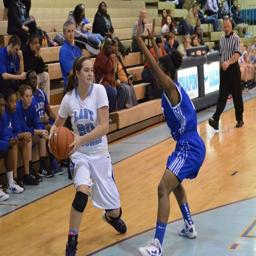

label :  basketball_court_indoor
img - densenet: basketball_court_indoor, prediction_score: 0.99996
total_num_patches 10
{'1': {'tcav': '0.5457142857142857', 'rank': 4, 'num_of_patches': 2}, '2': {'tcav': '0.5385714285714286', 'rank': 5, 'num_of_patches': 2}, '6': {'tcav': '0.5292857142857142', 'rank': 7, 'num_of_patches': 1}, '8': {'tcav': '0.4978571428571429', 'rank': 8, 'num_of_patches': 1}, '4': {'tcav': '0.4942857142857143', 'rank': 9, 'num_of_patches': 3}, '5': {'tcav': '0.4114285714285714', 'rank': 10, 'num_of_patches': 1}}


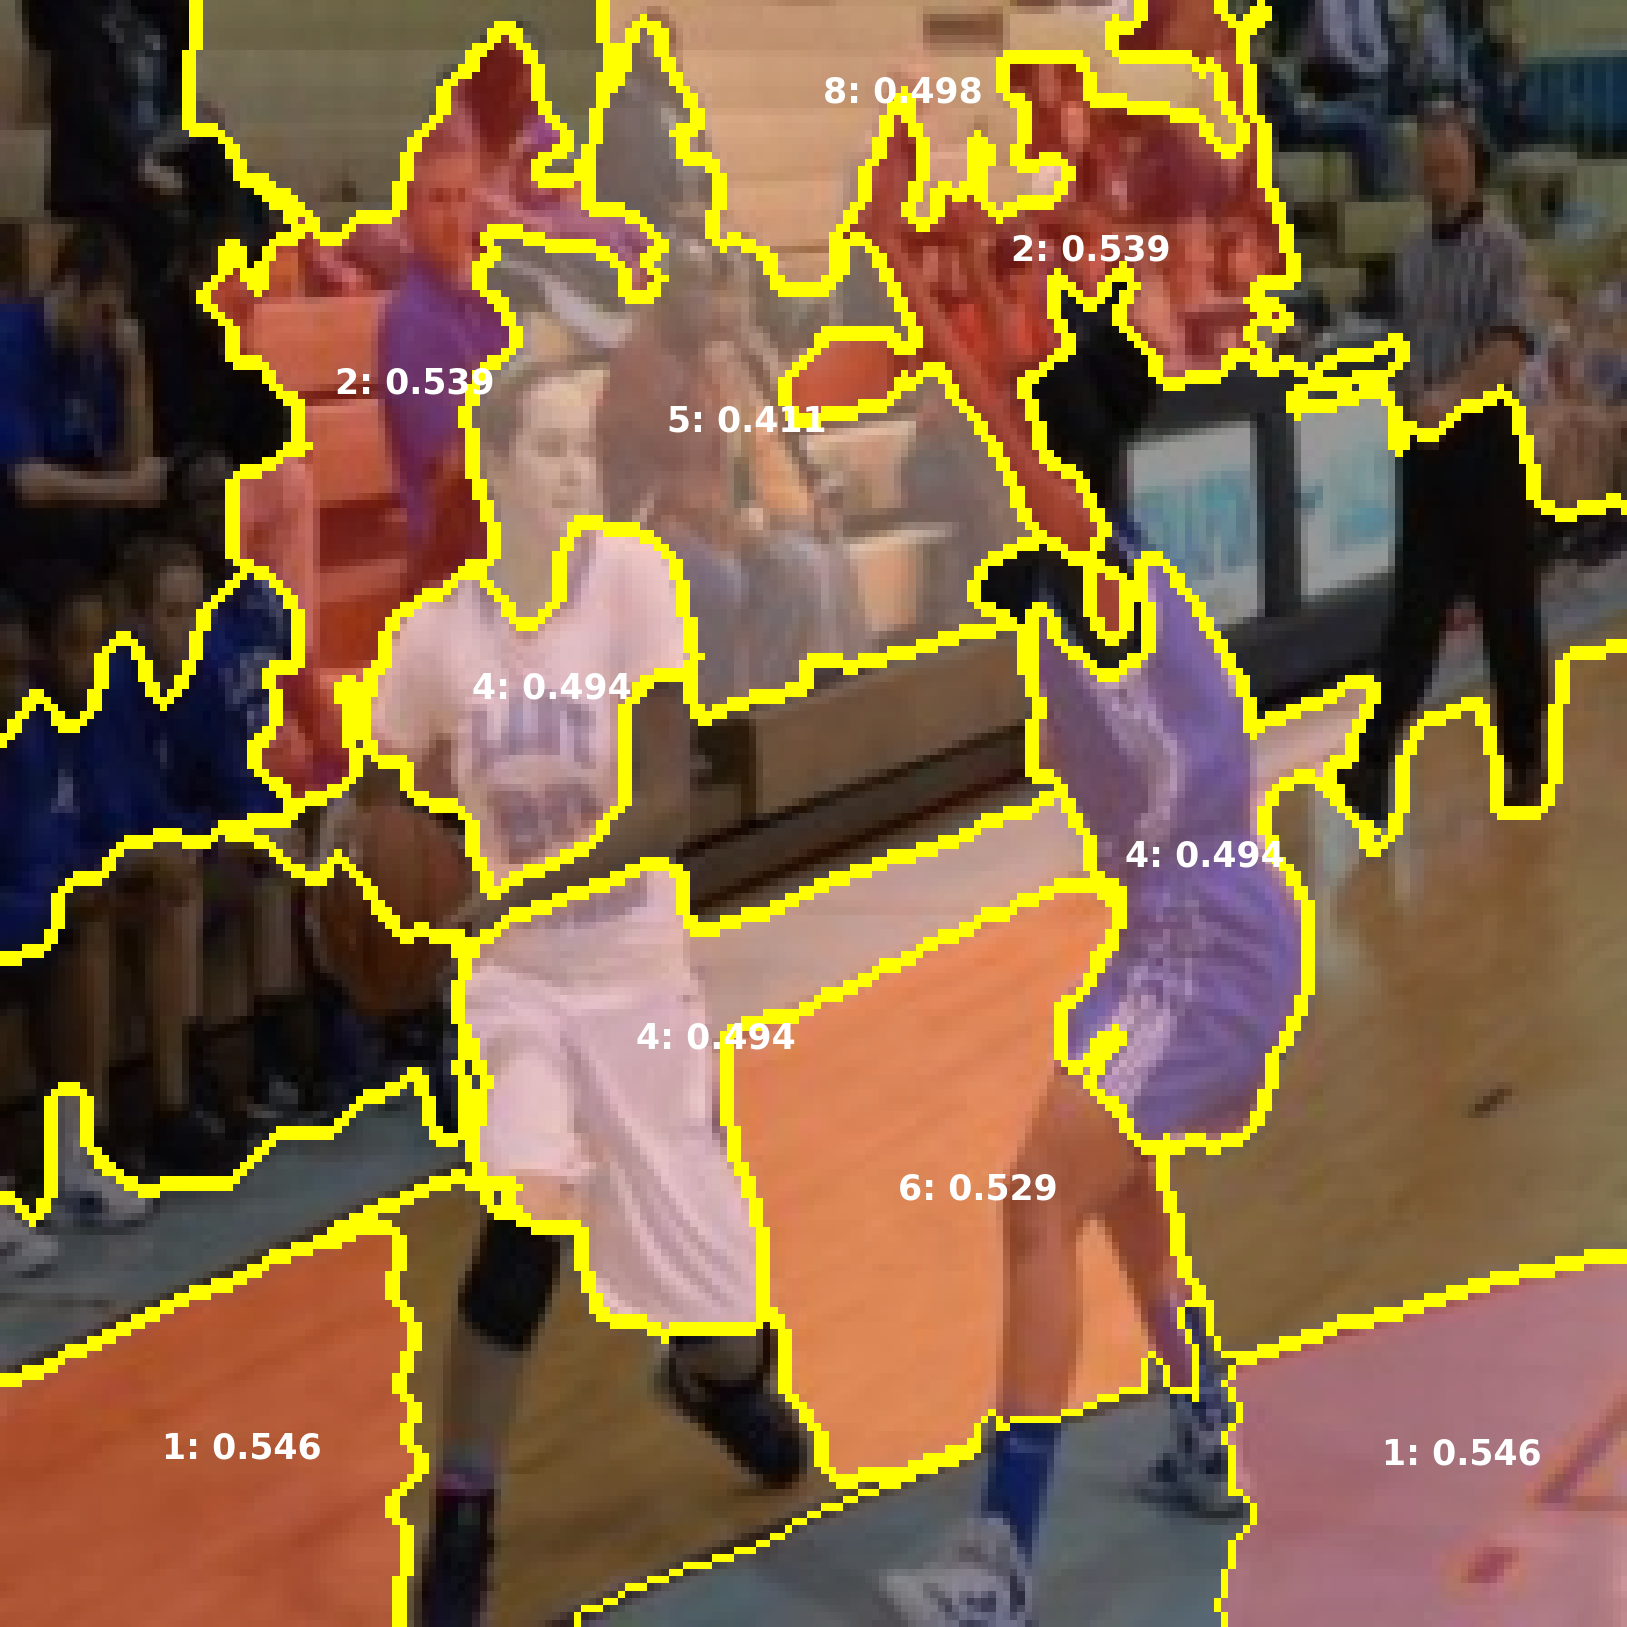

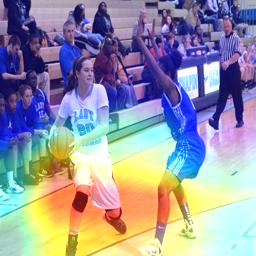

In [20]:
ap, sc = show_prediction_result(400, result_data, d_basket, 3)

In [47]:
ap

{'10': {'path': ['Ace-results2\\ACE_DenseNet_arcade\\concepts\\conv5_block16_concat_amusement-arcade_concept_10_patches\\0069_16.png',
   'Ace-results2\\ACE_DenseNet_arcade\\concepts\\conv5_block16_concat_amusement-arcade_concept_10_patches\\0069_2.png',
   'Ace-results2\\ACE_DenseNet_arcade\\concepts\\conv5_block16_concat_amusement-arcade_concept_10_patches\\0069_6.png'],
  'concept_id': ['0069_16', '0069_2', '0069_6'],
  'tcav': '0.5357142857142857',
  'pvalue': '0.13904757597051198\n'},
 '3': {'path': ['Ace-results2\\ACE_DenseNet_arcade\\concepts\\conv5_block16_concat_amusement-arcade_concept_3_patches\\0069_67.png',
   'Ace-results2\\ACE_DenseNet_arcade\\concepts\\conv5_block16_concat_amusement-arcade_concept_3_patches\\0069_9.png'],
  'concept_id': ['0069_67', '0069_9'],
  'tcav': '0.6121428571428572',
  'pvalue': '0.001113153789395868\n'},
 '6': {'path': ['Ace-results2\\ACE_DenseNet_arcade\\concepts\\conv5_block16_concat_amusement-arcade_concept_6_patches\\0069_34.png'],
  'conce

In [53]:
sc

['2', '15', '9', '12', '4', '6', '11']